<a href="https://www.kaggle.com/code/nishitkaul88/neural-network-just-numpy?scriptVersionId=160371763" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Deep Neural Network from Scratch: Numpy

A **Deep Neural Network (DNN)** is a machine learning algorithm inspired by the functioning of the human brain. Primarily used for classification, this article outlines a step-by-step approach to implementing the fundamental DNN algorithm using the NumPy library in Python.

The purpose of this tutorial is to provide a comprehensive understanding of how neural networks operate and the intricacies of their implementation. The focus will be on constructing a simple three-letter *(A, B, C)* classifier. To simplify the process, we'll represent the letters *(A, B, C)* as NumPy arrays containing 0s and 1s. Additionally, for simplicity, we will disregard the bias term associated with each node.

### Importing the necessary packages.

We will need **Numpy** for basic array conversions and feed-forward operations, and **Matplotlib** to visualize data, output and frame-building

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Generating the dataset using NumPy arrays filled with 0s and 1s. Since an image is essentially a matrix of pixel values, we will create these pixel matrices for the letters A, B, and C.**

In [2]:
#Creating the demo dataset
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]

b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
 
# Adjusting the labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

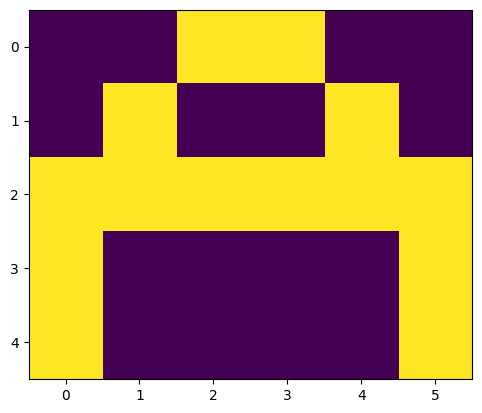

In [3]:
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [4]:
x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), 
                                np.array(c).reshape(1, 30)]
 
 
# Labels are also converted into NumPy array
y = np.array(y)
 
 
print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


## Defining the Neural Network Architecture 
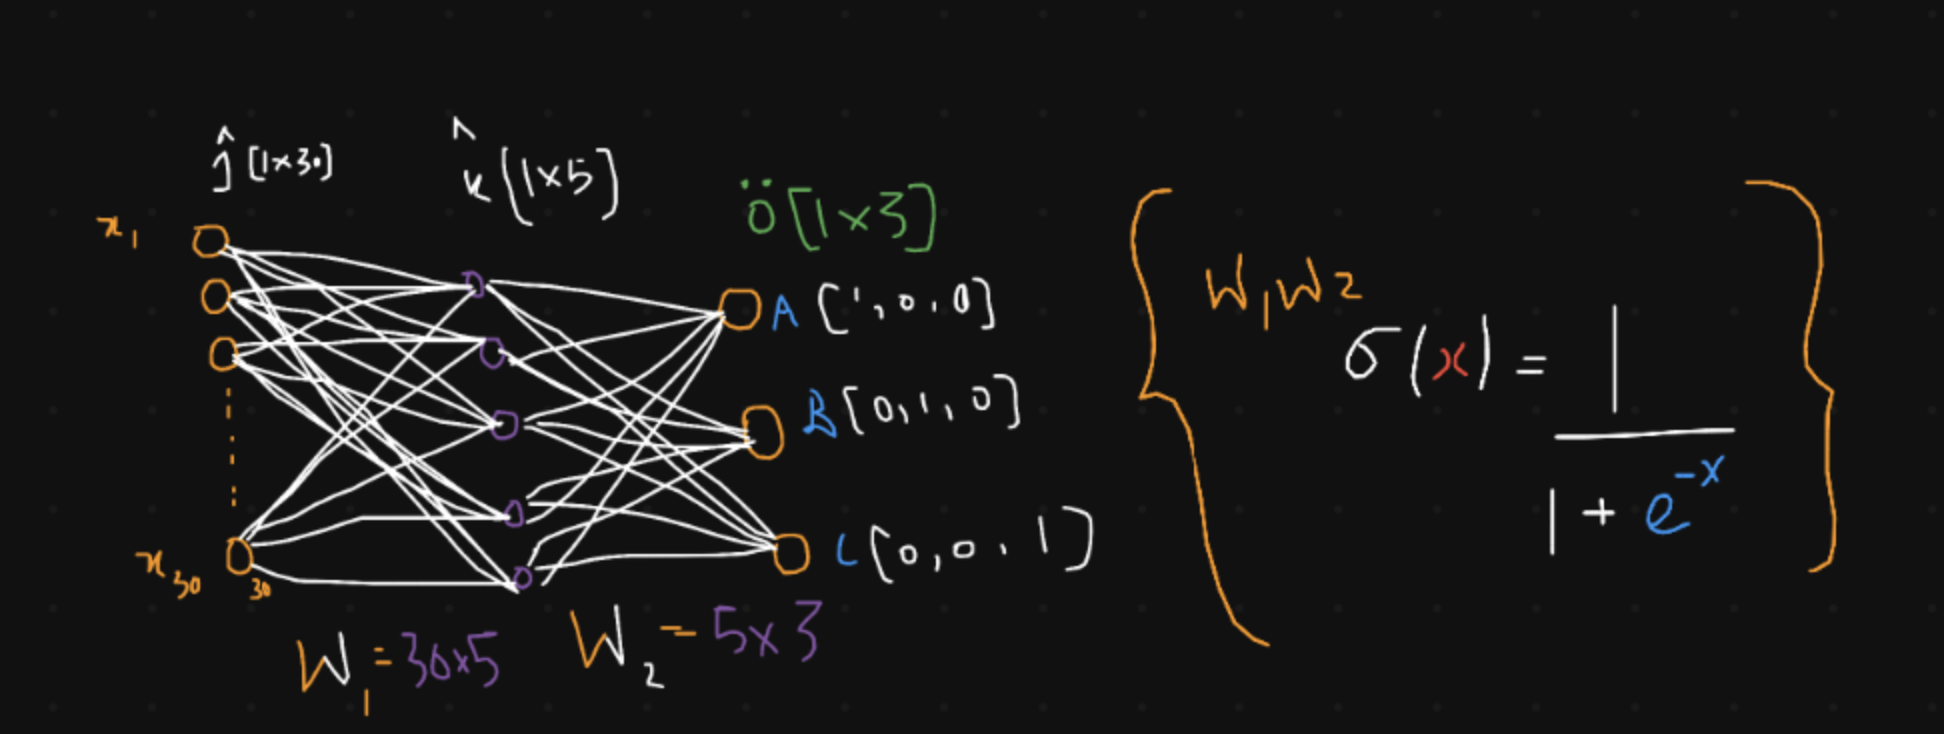
### Using Sigmoid Activation

The sigmoid function, also known as the logistic function, is a mathematical function commonly used in machine learning and neural networks. It has an S-shaped curve and is defined by the formula:

$$\sigma(x) = {1 \over {1 + e^-x}}$$



In [5]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# out put of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1 
	a1 = sigmoid(z1)# output of layer 2 
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show() 




### Initializing the weights
There will be **2 different weights** as this is a **3-layered NN**

$$w1 = 30 x 5$$ ; $$w2 = 5 x 3$$

In [6]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[ 0.23785106 -0.56244037  1.39169814  1.83422019  1.05572211]
 [-0.14125797  0.19450889 -0.33459704  0.65245747  0.01057322]
 [ 1.51054906 -0.33290739 -0.58009306 -0.36027913  0.78227052]
 [-0.08377207 -2.22494558  0.14869132 -1.25192278 -1.41955775]
 [ 0.73424504  1.62781634 -0.56340147  1.49479901  0.5381044 ]
 [ 0.4198341   1.5859931   0.39717109 -1.3264605   0.14470245]
 [-0.02437201  0.737448    1.20369679 -0.52530401  0.68588062]
 [-0.63320073  0.63687329 -3.00745154  1.26341315  1.02903281]
 [-0.06073818  0.08746778  0.77603653 -0.66502671 -0.77146008]
 [ 0.28505306 -0.40882288  1.97084246  0.06019242 -0.53857324]
 [ 0.79342227  0.48749832  0.6082674  -1.66225962 -0.32017976]
 [ 0.60664921  0.27009342 -1.57863476  0.77166248 -0.41195707]
 [ 0.27208237  1.29832228  0.79840912  0.1425872   0.78135234]
 [ 0.65131637  0.33319278  0.81758495 -1.74675078 -0.11959051]
 [ 0.00350336  1.7502033   0.12544803  1.07566078 -1.5937858 ]
 [ 1.65002013  0.38471402  0.37317223  2.13595897 -1.97

## Moment of Truth :

***Training the model***

In [7]:
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

epochs: 1 ======== acc: 52.96536964017098
epochs: 2 ======== acc: 56.76942445385693
epochs: 3 ======== acc: 60.772686866076356
epochs: 4 ======== acc: 64.47529676063863
epochs: 5 ======== acc: 67.40629304880473
epochs: 6 ======== acc: 69.84956802323119
epochs: 7 ======== acc: 71.9907813557981
epochs: 8 ======== acc: 73.90689797684027
epochs: 9 ======== acc: 75.63002154527389
epochs: 10 ======== acc: 77.17279552608315
epochs: 11 ======== acc: 78.54374317879265
epochs: 12 ======== acc: 79.75582641941202
epochs: 13 ======== acc: 80.82815029427877
epochs: 14 ======== acc: 81.783212225647
epochs: 15 ======== acc: 82.64307262077229
epochs: 16 ======== acc: 83.42663739268994
epochs: 17 ======== acc: 84.14857260013716
epochs: 18 ======== acc: 84.81939846856022
epochs: 19 ======== acc: 85.44614307627228
epochs: 20 ======== acc: 86.03317126232554
epochs: 21 ======== acc: 86.58304818528806
epochs: 22 ======== acc: 87.09737777478436
epochs: 23 ======== acc: 87.57751938524736
epochs: 24 ======== ac

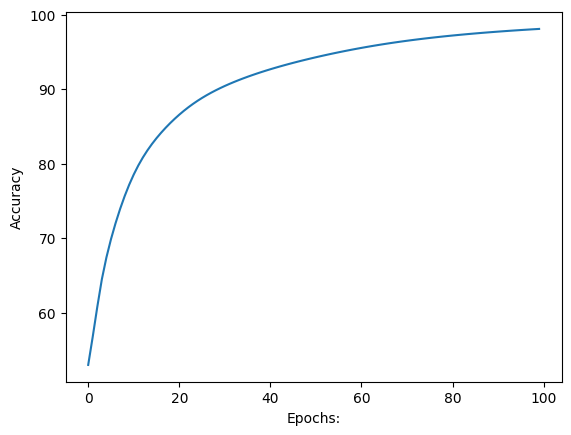

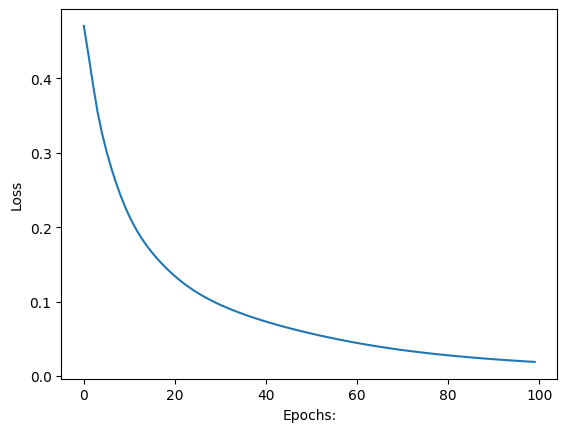

In [8]:
import matplotlib.pyplot as plt

# plotting accuracy
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

# plotting Loss
plt.plot(losss)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()


In [9]:

print(w1, "\n", w2)


[[ 0.23785106 -0.56244037  1.39169814  1.83422019  1.05572211]
 [ 0.18017904  0.38328037  0.08157302  0.67901287  0.34883557]
 [ 1.867609   -0.68047412 -0.46373571 -0.36951911  0.80135568]
 [ 0.27328788 -2.57251231  0.26504868 -1.26116276 -1.40047258]
 [ 1.05568205  1.81658782 -0.14723141  1.52135441  0.87636675]
 [ 0.4198341   1.5859931   0.39717109 -1.3264605   0.14470245]
 [-0.02437201  0.737448    1.20369679 -0.52530401  0.68588062]
 [-0.27614078  0.28930657 -2.89109419  1.25417318  1.04811797]
 [-0.06073818  0.08746778  0.77603653 -0.66502671 -0.77146008]
 [ 0.28505306 -0.40882288  1.97084246  0.06019242 -0.53857324]
 [ 0.79345546  1.21297352 -0.02898102 -1.70873028 -0.2469921 ]
 [ 0.60664921  0.27009342 -1.57863476  0.77166248 -0.41195707]
 [ 0.30770531  0.76198407  0.49859641  0.10679183  0.46217515]
 [ 1.00837631 -0.01437395  0.9339423  -1.75599075 -0.10050534]
 [ 0.00353655  2.47567851 -0.51180038  1.02919012 -1.52059814]
 [ 1.65005332  1.11018922 -0.26407619  2.08948832 -1.89

## Actually Testing the Neural Network

The predict function will take the following arguments:


**1) image matrix** 

**2) w1 trained weights**

**3) w2 trained weights**


Image is of letter B.


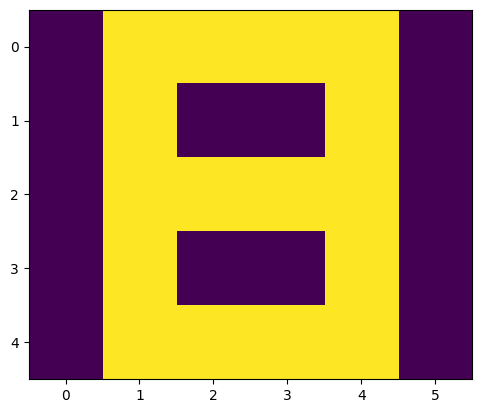

In [10]:
predict(x[1], w1, w2)